<a href="https://colab.research.google.com/github/akmalrusdy/tubesSKO/blob/main/Akmal_Rusdy_Prasetyo_1101184015_TUBES_SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Akmal Rusdy Prasetyo

NIM : 1101184015

Kelas : TT-42-02

---
Skenario Perancangan FTTB :

Suatu gedung memiliki 13 lantai dan tinggi rata rata tiap lantai adalah 5 m. Jarak dari Gedung ke Sentral terdekat berkisar diantara 15 km. Pemasangan direncana menggunakan 6 konektor dan 2 splitter, splitter yang digunakan berjenis splitter 1:16 dengan redaman 13.5 dB untuk ONU ke ODP dan splitter 1:32 dengan redaman 16.6 dB untuk ODP ke Roset. Kami menggunakan fiber jenis G657 dengan panjang gelombang 1490 nm dengan redaman 0.4 dB/Km. Maka dari itu dapat diperoleh 8 buah splicer yang memiliki redaman 0.1 db.

DIK :
*   Tinggi Gedung = 13*5 = 65m
*   Jumlah Konektor = 6
*   Jumlah Splitter = 2
*   Jumlah Splicer = 4
*   Fiber Jenis G657, panjang gelombang 1490nm, redaman 0.4 dB/Km
*   Redaman Splicer 0.1 dB











In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#SNR
R = 0.8 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 90*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 300 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#PR
d = np.arange(0.065,15.065,1) #Jarak (km)
l_f = 0.4 #0.2 #Loss Fiber (dB/km)
n_s = 4 #Jumlah Splicer
l_s = 0.1 #Loss dari splicer (dB)
n_c = 6 #Jumlah Konektor
l_c = 0.3 #Loss dari konektor (dB)
l_sp = 13.5 + 16.5 #loss dari splitter (dB)
Pt = 3 #Daya tx (dBm)

In [3]:
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  res_fiber = d * l_f
  res_splicer = n_s * l_s
  res_connector = n_c * l_c

  alfa_tot = res_fiber + res_splicer + res_connector + l_sp + SM
  Pr = Pt - alfa_tot
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-32.226 -32.626 -33.026 -33.426 -33.826 -34.226 -34.626 -35.026 -35.426
 -35.826 -36.226 -36.626 -37.026 -37.426 -37.826]


In [4]:
def arus_primer():
  Pr_num = LtN(Pr)
  Ip = Pr_num * R
  return Ip
Ip = arus_primer()
print("Ip = ", Ip)

Ip =  [0.00047917 0.00043701 0.00039856 0.00036349 0.0003315  0.00030234
 0.00027573 0.00025147 0.00022935 0.00020917 0.00019076 0.00017398
 0.00015867 0.00014471 0.00013197]


In [5]:
def signal_power():
  SP = (Ip*M)**2
  return SP
SP = signal_power()
print('Signal Power = ', SP)

Signal Power =  [1.21460663e-08 1.01026579e-08 8.40302481e-09 6.98933161e-09
 5.81347282e-09 4.83543607e-09 4.02194054e-09 3.34530443e-09
 2.78250303e-09 2.31438521e-09 1.92502177e-09 1.60116337e-09
 1.33178968e-09 1.10773441e-09 9.21373349e-10]


In [6]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*Ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = SP # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[36.50745262 35.71659725 34.92495407 34.13258962 33.33956505 32.54593651
 31.7517555  30.9570693  30.16192121 29.36635094 28.57039484 27.77408621
 26.97745552 26.18053064 25.38333709]


In [7]:
#RUMUS Q
def Q_rumus():
  Q = 0.5*(10**(SNR/20))
  return Q
Q = Q_rumus()
print(Q)

[33.44588064 30.53513657 27.87518174 25.444826   23.22460076 21.19663052
 19.34451205 17.65320112 16.10890665 14.69899192 13.4118827  12.23698182
 11.16459003 10.18583264  9.29259177]


In [8]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.03915600e-241 2.61205605e-201 1.30409224e-167 1.64081623e-139
 4.36222061e-116 1.45117997e-096 2.67267951e-080 9.44326683e-067
 1.80769814e-055 4.46134374e-046 2.92710662e-038 9.33958820e-032
 2.39854635e-026 7.54748992e-022 4.13115409e-018]


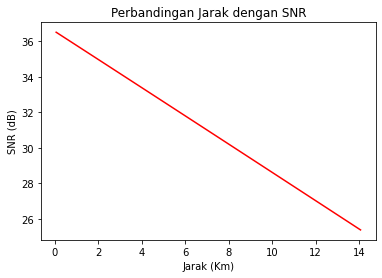

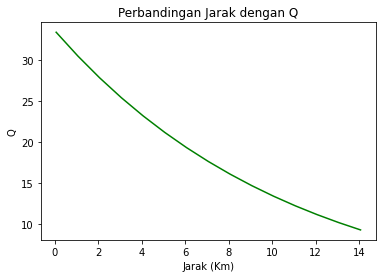

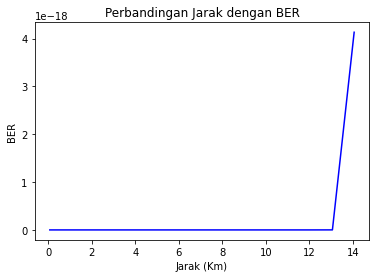

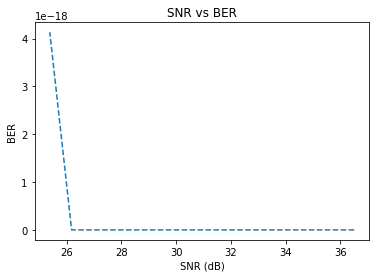

In [9]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_4():
  plt.figure()
  plt.plot(SNR,BER,'--')
  plt.title('SNR vs BER')
  plt.xlabel('SNR (dB)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()
grafik_4()

Analisis : Dari analisis grafis di atas, dapat disimpulkan bahwa semakin banyak konektor, splitter dan penyambung fusi, dan pemilihan jenis serat akan mempengaruhi resistansi total dan akan mempengaruhi daya yang diterima. Dari daya yang diterima kita dapat melihat hasil SNR, semakin jauh jaraknya maka daya yang diterima semakin kecil, sehingga SNR semakin kecil dan kecil.